**GRIP:The Sparks Foundation
GRIPNOVEMBER22
Author: MASNA
Task-4 : Exploratory Data Analysis-Terrorism. (Level -Intermediate)

task:  1.Find out the hot zone of terrorism
       2.What all security issues and insights you can derive by EDA?
       
Data Science and Business Intelligence Intern**

**importing libraries**

In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**reading csv file to pandas data frame**

In [2]:
terr=pd.read_csv('globalterrorism.csv',encoding="latin-1")
terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# EDA(Exploratory Data Analysis)

In [4]:
#shape of dataframe

In [94]:
terr.shape

(181691, 135)

In [ ]:
#There are 181691 with 135 column which is a big data setwhich is quite large

In [3]:
terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#listing out all the column names after converting it intoa list

In [4]:
num_of_col=terr.columns.tolist()
print("The names of columns in data frame:\n",num_of_col)

The names of columns in data frame:
 ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode

When i tried to understand data i could see some columns are vague now creating new data frame including only required columnwithout proper meaning.Some columns are redundant(repeated).Some columns are blank colums.Some column names are also to be renamed for good readability.So the step is to rename columns and select only required columns from the data frame there by doing dimensionality reduction.

In [5]:
#renaming required columns
terr.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day",'country_txt':"Country","provstate":"State",
                   "region_txt":"Region","attacktype1_txt":"Attacktype","target1":"target","nkill":"No_of_Killed",
                    "nwound":"No_of_Wounded","gname":"Group","targtype1_txt":"target_type","weaptype1_txt":"Weapon_type"},inplace=True)

In [6]:
#now creating new data frame including only required column
terr_new=terr[["Year","Month","Day","Country","State","Region",'city','latitude', 'longitude','Attacktype',"No_of_Killed","No_of_Wounded",
         "target","summary","Group","target_type","Weapon_type"]]

In [7]:
terr_new.head(50)

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attacktype,No_of_Killed,No_of_Wounded,target,summary,Group,target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary


In [31]:
#finding the information regarding data

In [8]:
terr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   State          181270 non-null  object 
 5   Region         181691 non-null  object 
 6   city           181257 non-null  object 
 7   latitude       177135 non-null  float64
 8   longitude      177134 non-null  float64
 9   Attacktype     181691 non-null  object 
 10  No_of_Killed   171378 non-null  float64
 11  No_of_Wounded  165380 non-null  float64
 12  target         181055 non-null  object 
 13  summary        115562 non-null  object 
 14  Group          181691 non-null  object 
 15  target_type    181691 non-null  object 
 16  Weapon_type    181691 non-null  object 
dtypes: float64(4), int64(3), obje

In [ ]:
#we have made a dimensionality reduction from 135columns to 17 columns for better analysis of data

In [ ]:
#seeing the statistical description of data

In [9]:
terr_new.describe()

,Year,Month,Day,latitude,longitude,No_of_Killed,No_of_Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


**We are Analysisng Data from 1970 till 2017**

In [ ]:
#checking number of unique values in each column

In [10]:
terr_new.nunique()

Year                 47
Month                13
Day                  32
Country             205
State              2855
Region               12
city              36674
latitude          48322
longitude         48039
Attacktype            9
No_of_Killed        205
No_of_Wounded       238
target            86006
summary          112492
Group              3537
target_type          22
Weapon_type          12
dtype: int64

In [ ]:
#printing unique values of each columns

In [11]:
for i in terr_new.columns[:]:
    print(70*"#")
    print(i,":\n",terr_new[i].unique())

######################################################################
Year :
 [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
######################################################################
Month :
 [ 7  0  1  2  3  4  5  6  8  9 10 11 12]
######################################################################
Day :
 [ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
######################################################################
Country :
 ['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 

summary :
 [nan
 '1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.'
 '1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.'
 ...
 '12/31/2017: Assailants set fire to houses in Kubentog, Datu Hoffer, Maguindanao, Philippines. There were no reported casualties in the attack. No group claimed responsibility for the incident; however, sources attributed the attack to the Bangsamoro Islamic Freedom Movement (BIFM).'
 '12/31/2017: Assailants threw a grenade at a Forest Department office in Mantripukhri neighborh

*we can see there are 13 unique values in month column and carefully observeing there is a value 0 in the list so trying to replace it with the most ffrequent occuring month *

In [12]:
terr_new['Month'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

In [13]:
terr_new["Month"].mode()

0    5
dtype: int64

In [15]:
terr_new['Month']=terr_new['Month'].replace(0,terr_new['Month'].mode()[0])

**null value treatment**

In [ ]:
#checking the number and corresponding percentage of null value in the data

In [17]:
def no_perc_null(terr_new):
    no_of_null=terr_new.isnull().sum()
    percentage_of_null=terr_new.isnull().sum()/len(terr_new)*100
    dtypecol=terr_new.dtypes
    null_val=pd.concat([no_of_null,percentage_of_null,dtypecol],axis=1)
    null_val_new=null_val.rename(columns={0:"Null values",1:"Percentage",2:"Dataype"})
    return null_val_new
no_perc_null(terr_new)

,Null values,Percentage,Dataype
Year,0,0.000000,int64
Month,0,0.000000,int64
Day,0,0.000000,int64
Country,0,0.000000,object
State,421,0.231712,object
Region,0,0.000000,object
city,434,0.238867,object
latitude,4556,2.507554,float64
longitude,4557,2.508104,float64
Attacktype,0,0.000000,object


*There are columns with null value to treat so considering columns one by one*

**Nullvalue treatment of latitude and longitude column**

*stepsinvolve in treat ment of latitude and longitude column null value
    1.Extracting rows with null value in latitude to new data frame terr_new2
    2.Removing the rows with null value in latitude column from original data frame terr_new
    3.treating the null value using geopy library og python
    4.concatenating terr_new2 with terr_new1*

In [20]:
terr_new2=terr_new[terr_new["latitude"].isna()]

In [21]:
terr_new.dropna(subset=["latitude"],inplace=True)

In [25]:
terr_new.shape

(177135, 17)

In [24]:
terr_new2.shape

(4556, 17)

In [26]:
def no_perc_null(terr_new2):
    no_of_null=terr_new2.isnull().sum()
    percentage_of_null=terr_new2.isnull().sum()/len(terr_new2)*100
    dtypecol=terr_new2.dtypes
    null_val=pd.concat([no_of_null,percentage_of_null,dtypecol],axis=1)
    null_val_new=null_val.rename(columns={0:"Null values",1:"Percentage",2:"Dataype"})
    return null_val_new
no_perc_null(terr_new2)

,Null values,Percentage,Dataype
Year,0,0.000000,int64
Month,0,0.000000,int64
Day,0,0.000000,int64
Country,0,0.000000,object
State,12,0.263389,object
Region,0,0.000000,object
city,8,0.175593,object
latitude,4556,100.000000,float64
longitude,4556,100.000000,float64
Attacktype,0,0.000000,object


In [ ]:
#we can see % of null valuesin latitude and longitude column as 100 % as we have extracted that way ,now we need to traet this

**using of geopy library**

In [28]:
#Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
    
for i in terr_new2.index:
        location = geolocator.geocode(terr_new2['Region'][i])
        if location!=None:
            terr_new2['latitude'][i]=location.latitude
            terr_new2['longitude'][i]=location.longitude      
        else:  
            terr_new2['latitude'][i]=np.nan
            terr_new2['longitude'][i]=np.nan
terr_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4556 entries, 16 to 181542
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4556 non-null   int64  
 1   Month          4556 non-null   int64  
 2   Day            4556 non-null   int64  
 3   Country        4556 non-null   object 
 4   State          4544 non-null   object 
 5   Region         4556 non-null   object 
 6   city           4548 non-null   object 
 7   latitude       4012 non-null   float64
 8   longitude      4012 non-null   float64
 9   Attacktype     4556 non-null   object 
 10  No_of_Killed   4022 non-null   float64
 11  No_of_Wounded  3913 non-null   float64
 12  target         4518 non-null   object 
 13  summary        949 non-null    object 
 14  Group          4556 non-null   object 
 15  target_type    4556 non-null   object 
 16  Weapon_type    4556 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage:

In [29]:
def no_perc_null(terr_new2):
    no_of_null=terr_new2.isnull().sum()
    percentage_of_null=terr_new2.isnull().sum()/len(terr_new2)*100
    dtypecol=terr_new2.dtypes
    null_val=pd.concat([no_of_null,percentage_of_null,dtypecol],axis=1)
    null_val_new=null_val.rename(columns={0:"Null values",1:"Percentage",2:"Dataype"})
    return null_val_new
no_perc_null(terr_new2)

,Null values,Percentage,Dataype
Year,0,0.000000,int64
Month,0,0.000000,int64
Day,0,0.000000,int64
Country,0,0.000000,object
State,12,0.263389,object
Region,0,0.000000,object
city,8,0.175593,object
latitude,544,11.940299,float64
longitude,544,11.940299,float64
Attacktype,0,0.000000,object


**Percentage of null values drastically reduced to 12% from 100 %**

In [ ]:
#now concatenating terr_new2 with terr_new to create a new data frame df

In [30]:
df=pd.concat([terr_new,terr_new2],axis=0)

In [31]:
def no_perc_null(df):
    no_of_null=df.isnull().sum()
    percentage_of_null=df.isnull().sum()/len(df)*100
    dtypecol=df.dtypes
    null_val=pd.concat([no_of_null,percentage_of_null,dtypecol],axis=1)
    null_val_new=null_val.rename(columns={0:"Null values",1:"Percentage",2:"Dataype"})
    return null_val_new
no_perc_null(df)

,Null values,Percentage,Dataype
Year,0,0.000000,int64
Month,0,0.000000,int64
Day,0,0.000000,int64
Country,0,0.000000,object
State,421,0.231712,object
Region,0,0.000000,object
city,434,0.238867,object
latitude,544,0.299409,float64
longitude,545,0.299960,float64
Attacktype,0,0.000000,object


In [ ]:
#0.3% of null values in latitude and longitude column is considered negligible

In [ ]:
**Null value treatment of city and state column

*stepsinvolve in treat ment of State and city column null value
    1.Extracting rows with null value in state to new data frame terr_st
    2.Removing the rows with null value in state column from original data frame 
    3.treating the null value using geopy library of python
    4.concatenating df and terr_st data frames*

In [33]:
terr_st=df[df["State"].isna()]

In [ ]:
df.dropna(subset=["State",'city'],inplace=True)

**using of geopy library**

 **replacing the null values of state and city using geopy library with the help of latitude and longitude values**

In [34]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
    
for i in terr_st.index:
    try:
            latitude=str(terr_st['latitude'][i])
            longitude=str(terr_st['longitude'][i])
            location = geolocator.reverse(latitude+","+longitude)
            address=location.raw['address']
            terr_st['State'][i]=address.get('state')
            terr_st['city'][i]=address.get('city')
    except:
         ValueError("Must be a coordinate pair or Point")

In [ ]:
#concatenating data framestogether after null value treatment

In [35]:
df1=pd.concat([df,terr_st],axis=0)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182112 entries, 0 to 56927
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           182112 non-null  int64  
 1   Month          182112 non-null  int64  
 2   Day            182112 non-null  int64  
 3   Country        182112 non-null  object 
 4   State          181601 non-null  object 
 5   Region         182112 non-null  object 
 6   city           181499 non-null  object 
 7   latitude       181567 non-null  float64
 8   longitude      181566 non-null  float64
 9   Attacktype     182112 non-null  object 
 10  No_of_Killed   171775 non-null  float64
 11  No_of_Wounded  165772 non-null  float64
 12  target         181472 non-null  object 
 13  summary        115574 non-null  object 
 14  Group          182112 non-null  object 
 15  target_type    182112 non-null  object 
 16  Weapon_type    182112 non-null  object 
dtypes: float64(4), int64(3), objec

In [37]:
def no_perc_null(df1):
    no_of_null=df1.isnull().sum()
    percentage_of_null=df1.isnull().sum()/len(df1)*100
    dtypecol=df.dtypes
    null_val=pd.concat([no_of_null,percentage_of_null,dtypecol],axis=1)
    null_val_new=null_val.rename(columns={0:"Null values",1:"Percentage",2:"Dataype"})
    return null_val_new
no_perc_null(df1)

,Null values,Percentage,Dataype
Year,0,0.000000,int64
Month,0,0.000000,int64
Day,0,0.000000,int64
Country,0,0.000000,object
State,511,0.280597,object
Region,0,0.000000,object
city,613,0.336606,object
latitude,545,0.299266,float64
longitude,546,0.299815,float64
Attacktype,0,0.000000,object


In [ ]:
#0.3% of null values in city and state column is considered negligible

In [38]:
df1["No_of_Killed"].fillna(df1["No_of_Killed"].mode()[0],inplace=True)
df1["No_of_Wounded"].fillna(df1["No_of_Wounded"].mode()[0],inplace=True)

In [39]:
def no_perc_null(df1):
    no_of_null=df1.isnull().sum()
    percentage_of_null=df1.isnull().sum()/len(df1)*100
    dtypecol=df.dtypes
    null_val=pd.concat([no_of_null,percentage_of_null,dtypecol],axis=1)
    null_val_new=null_val.rename(columns={0:"Null values",1:"Percentage",2:"Dataype"})
    return null_val_new
no_perc_null(df1)

,Null values,Percentage,Dataype
Year,0,0.000000,int64
Month,0,0.000000,int64
Day,0,0.000000,int64
Country,0,0.000000,object
State,511,0.280597,object
Region,0,0.000000,object
city,613,0.336606,object
latitude,545,0.299266,float64
longitude,546,0.299815,float64
Attacktype,0,0.000000,object


*% of null values in Number of killed and no of wonder becomes 0*

**Treating null value in target column with mode**

In [40]:
df1["target"].fillna(df1["target"].mode()[0],inplace=True)

In [43]:
df1.duplicated().sum()

9556

In [ ]:
#its noted that 9556 records are duplicated records .So dropping them

In [45]:
df1.drop_duplicates()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attacktype,No_of_Killed,No_of_Wounded,target,summary,Group,target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,5,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26120,1985,9,1,Nicaragua,Puerto Rico,Central America & Caribbean,San Juan,18.424911,-66.054711,Armed Assault,0.0,0.0,Unit,NaN,Democratic Revolutionary Alliance (ARDE),Military,Firearms
33668,1988,3,3,Nicaragua,Puerto Rico,Central America & Caribbean,San Juan,18.424911,-66.054711,Armed Assault,0.0,0.0,Military Unit,NaN,Nicaraguan Resistance,Military,Firearms
38876,1989,7,15,Guatemala,Puerto Rico,Central America & Caribbean,San Juan,18.424911,-66.054711,Armed Assault,0.0,0.0,Villiage Of Tamal,NaN,Unknown,Government (General),Firearms
51125,1992,4,22,Azerbaijan,Ошская область - Ош облусу,Central Asia,None,39.400922,72.867662,Bombing/Explosion,14.0,20.0,Bus,NaN,Unknown,Transportation,Explosives


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182112 entries, 0 to 56927
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           182112 non-null  int64  
 1   Month          182112 non-null  int64  
 2   Day            182112 non-null  int64  
 3   Country        182112 non-null  object 
 4   State          181601 non-null  object 
 5   Region         182112 non-null  object 
 6   city           181499 non-null  object 
 7   latitude       181567 non-null  float64
 8   longitude      181566 non-null  float64
 9   Attacktype     182112 non-null  object 
 10  No_of_Killed   182112 non-null  float64
 11  No_of_Wounded  182112 non-null  float64
 12  target         182112 non-null  object 
 13  summary        115574 non-null  object 
 14  Group          182112 non-null  object 
 15  target_type    182112 non-null  object 
 16  Weapon_type    182112 non-null  object 
dtypes: float64(4), int64(3), objec

# Visualization

**Univariate Analysis**

**Countries that are affected by terrorism:**

In [48]:
df1["Country"].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
St. Lucia                  1
North Korea                1
Wallis and Futuna          1
Antigua and Barbuda        1
Falkland Islands           1
Name: Country, Length: 205, dtype: int64

In [ ]:
#There are so 205 countries to analyse in the dataset. So Let us take top ten countries that are affected by terrorism and
#top ten countries least affected by terrorism

In [49]:
df1["Country"].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5337
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

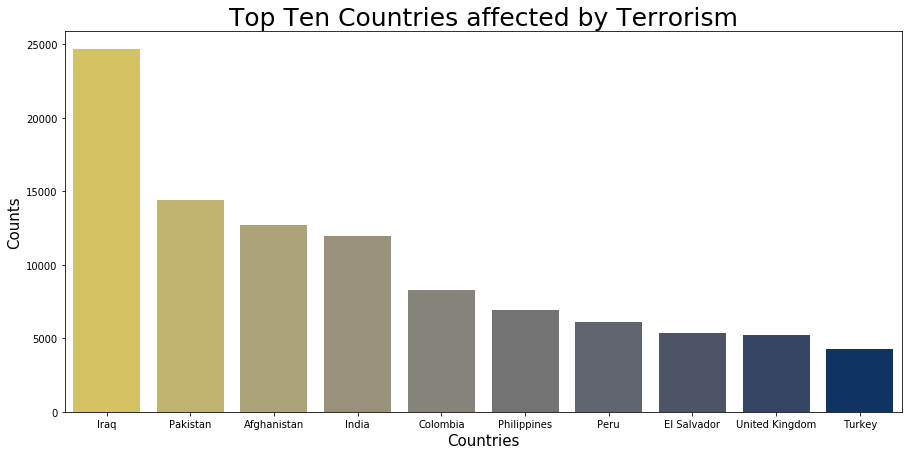

In [52]:
# Plotting this information graphically:

plt.figure(figsize=(15,7))
sns.barplot(df1["Country"].value_counts()[:10].index,df1["Country"].value_counts()[:10].values,palette="cividis_r")
plt.title("Top Ten Countries affected by Terrorism",fontsize=25)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show()

In [ ]:
#now let's see countries least affected by terrorism

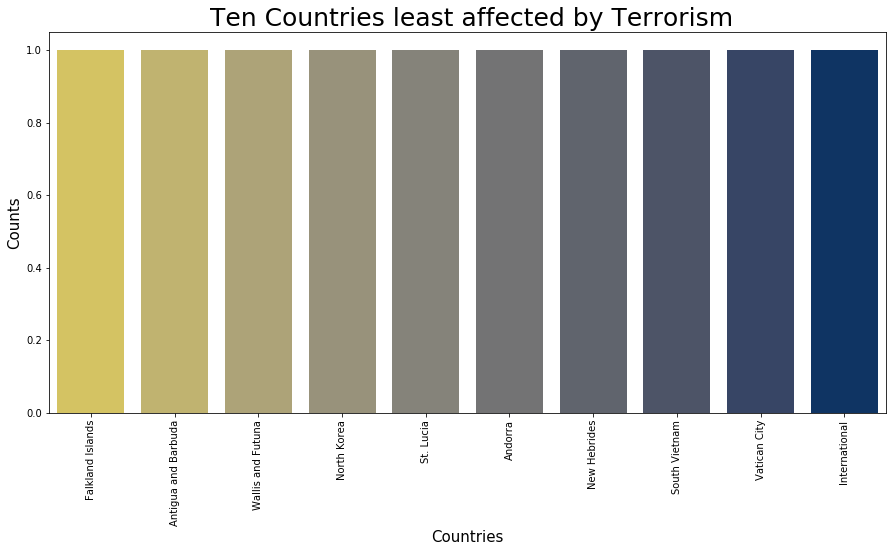

In [57]:
# Plotting this information graphically:

plt.figure(figsize=(15,7))
sns.barplot(df1["Country"].value_counts(ascending=True)[:10].index,df1["Country"].value_counts(ascending=True)[:10].values,palette="cividis_r")
plt.title(" Ten Countries least affected by Terrorism",fontsize=25)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Insights:
    1.Iraq followed by pakistan is most affected country
    2.There are also countries where number of attack is 1 like falkland Island

In [ ]:
# Analysing the number of attacks that took place every year

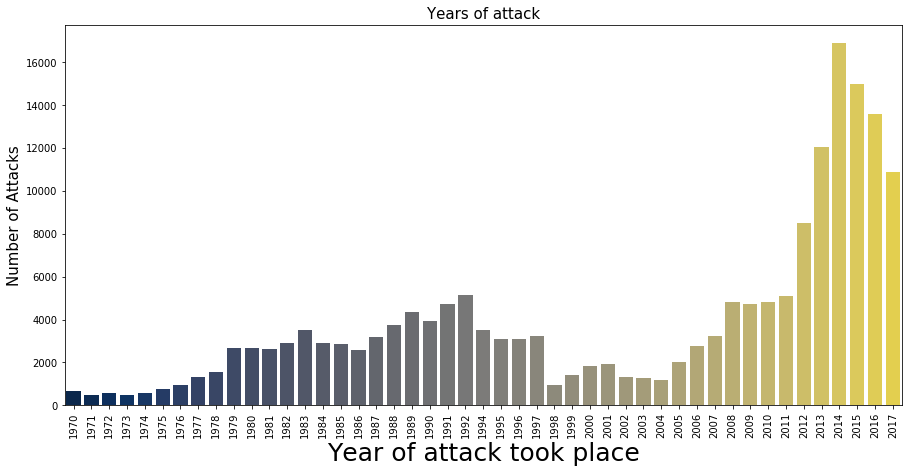

In [59]:
years = df1['Year'].unique()
count_of_years = df1['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,7))
sns.barplot(x = years,y = count_of_years,palette = "cividis")
plt.xticks(rotation = 90)
plt.xlabel('Year of attack took place',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Years of attack',fontsize=15)
plt.show()

Insights:
    1.There is a increase in  number of attack from 2012 which reached peak on 2014
    2.After 2015 a downward trend is observed

In [ ]:
# Analysing the Attack Types:

In [60]:
(df1["Attacktype"].value_counts())

Bombing/Explosion                      88382
Armed Assault                          42790
Assassination                          19385
Hostage Taking (Kidnapping)            11180
Facility/Infrastructure Attack         10390
Unknown                                 7298
Unarmed Assault                         1017
Hostage Taking (Barricade Incident)      997
Hijacking                                673
Name: Attacktype, dtype: int64

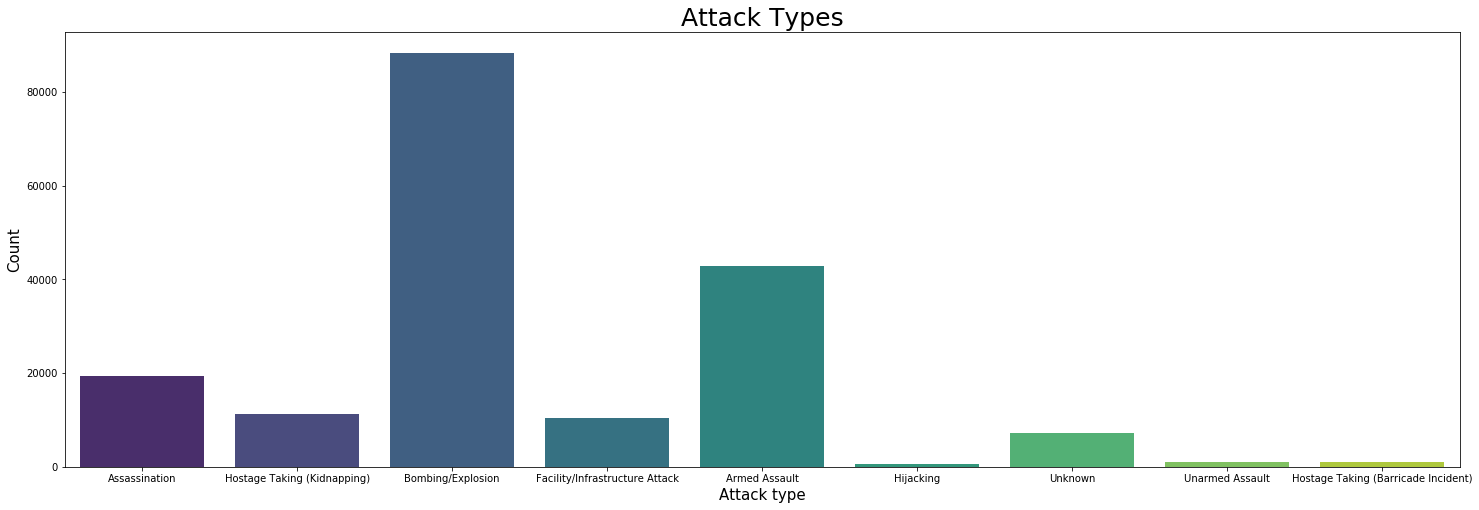

In [66]:
plt.figure(figsize=(25,8))
sns.countplot(df1["Attacktype"],palette="viridis")
plt.title("Attack Types",fontsize=25)
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [ ]:
Insights:
    Bombing/Explosion is most frequent attack type followed by Armed Assault

In [ ]:
# Analysing the number of deaths taken place in each year.

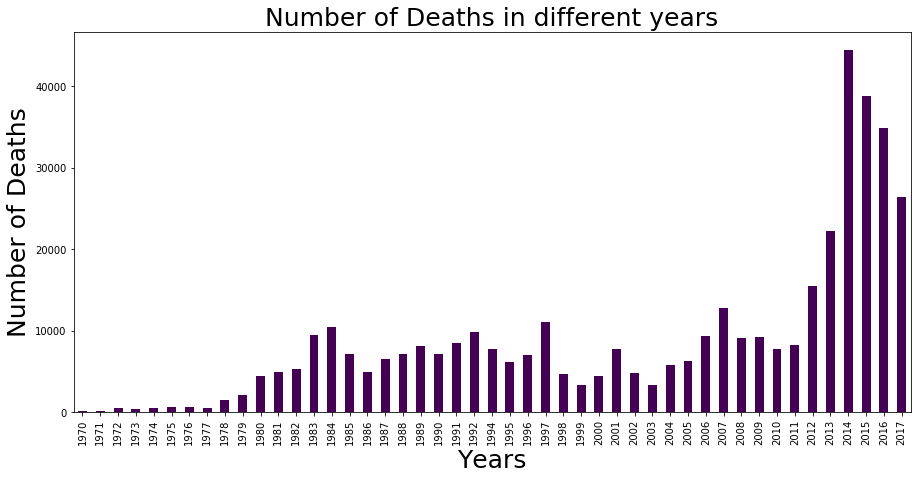

In [68]:
plt.figure(figsize = (15,7))
df1.groupby(['Year'])['No_of_Killed'].sum().plot(kind='bar',colormap="viridis")
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Analysing the number of Wounded taken place in each year.

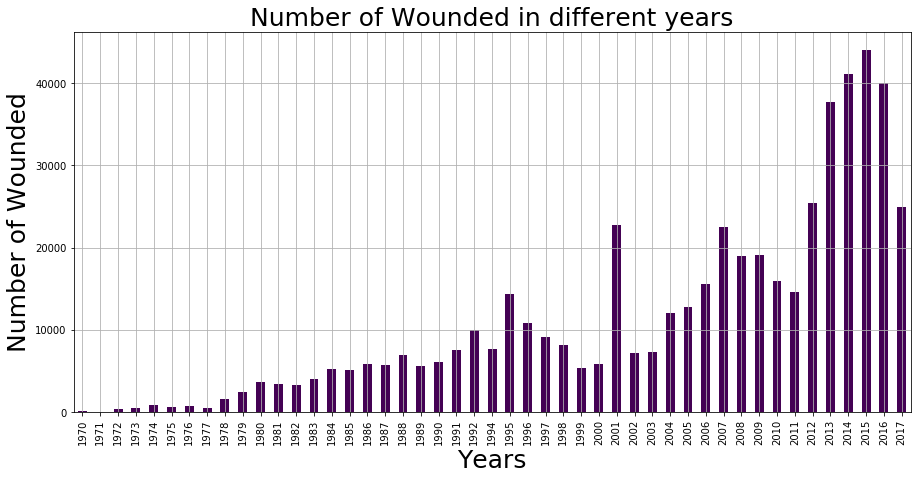

In [70]:
plt.figure(figsize = (15,7))
df1.groupby(['Year'])['No_of_Wounded'].sum().plot(kind='bar',colormap="viridis")
plt.title('Number of Wounded in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Wounded',fontsize=25)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Insights:
    1.Number of people killed is maximum 0n 2014 which is 40000+
    2.Number of people wounded is greater than 38000 from 2013 to 2016
    

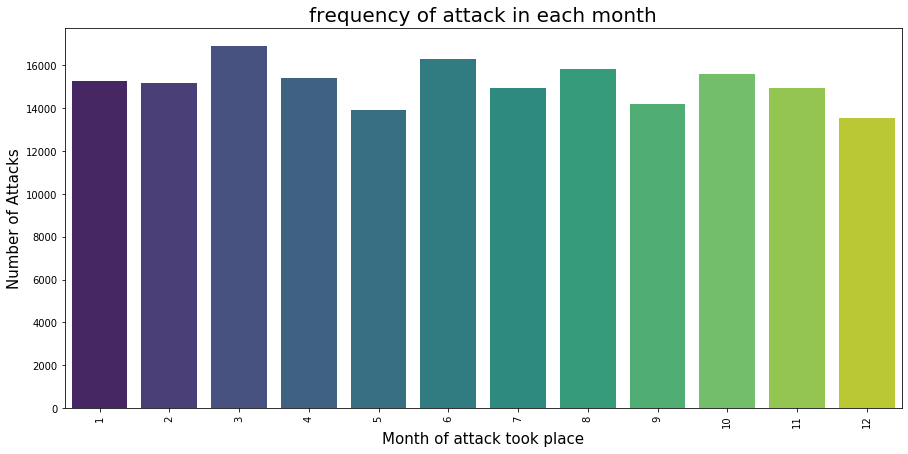

In [97]:
# Analysing the number of attacks that took place every month over the years

months = df1['Month'].unique()
count = df1['Month'].value_counts().sort_index()
plt.figure(figsize = (15,7))
sns.barplot(x = months,y = count,palette = "viridis")
plt.xticks(rotation = 90)
plt.xlabel('Month of attack took place',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('frequency of attack in each month',fontsize=20)
plt.show()

Insight:
    There is not much variation in frequency of attack during each month.

In [ ]:
#finding information regarding target type affected by attack

In [71]:
df1["target_type"].value_counts()


Private Citizens & Property       43578
Military                          28036
Police                            24559
Government (General)              21358
Business                          20717
Transportation                     6823
Utilities                          6035
Unknown                            5900
Religious Figures/Institutions     4452
Educational Institution            4328
Government (Diplomatic)            3601
Terrorists/Non-State Militia       3042
Journalists & Media                2960
Violent Political Party            1866
Airports & Aircraft                1358
Telecommunication                  1012
NGO                                 971
Tourists                            444
Maritime                            354
Food or Water Supply                317
Abortion Related                    264
Other                               137
Name: target_type, dtype: int64

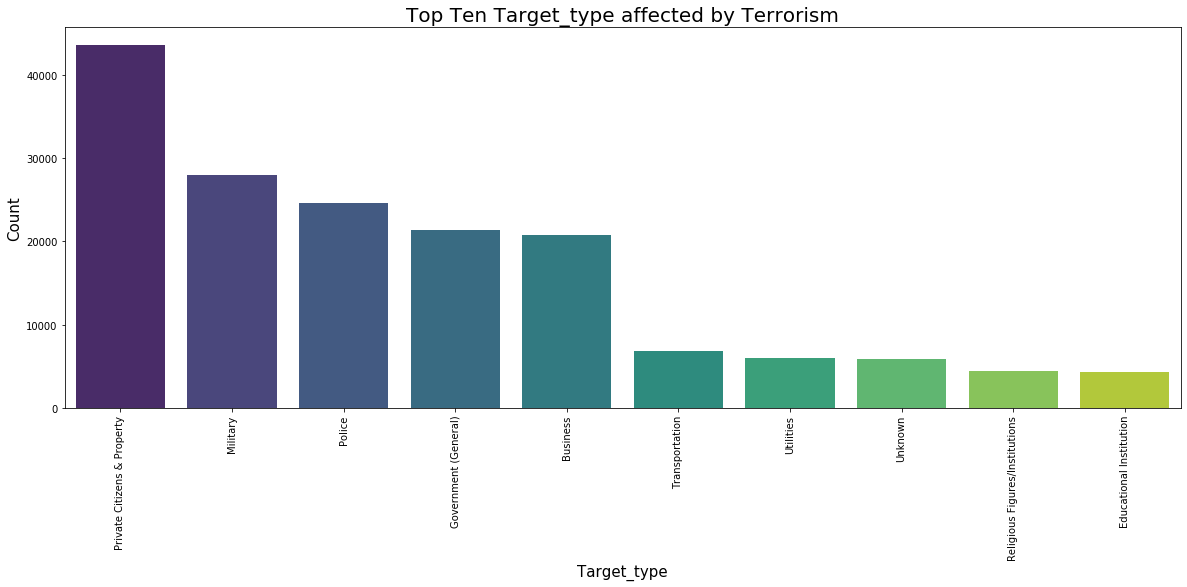

In [74]:
plt.figure(figsize=(20,7))
sns.barplot(df1["target_type"].value_counts()[:10].index,df1["target_type"].value_counts()[:10].values,palette="viridis")
plt.title("Top Ten Target_type affected by Terrorism",fontsize=20)
plt.xlabel("Target_type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
Insights:
    1.Private Citizens and property is mostly affected by the attack followed by Military

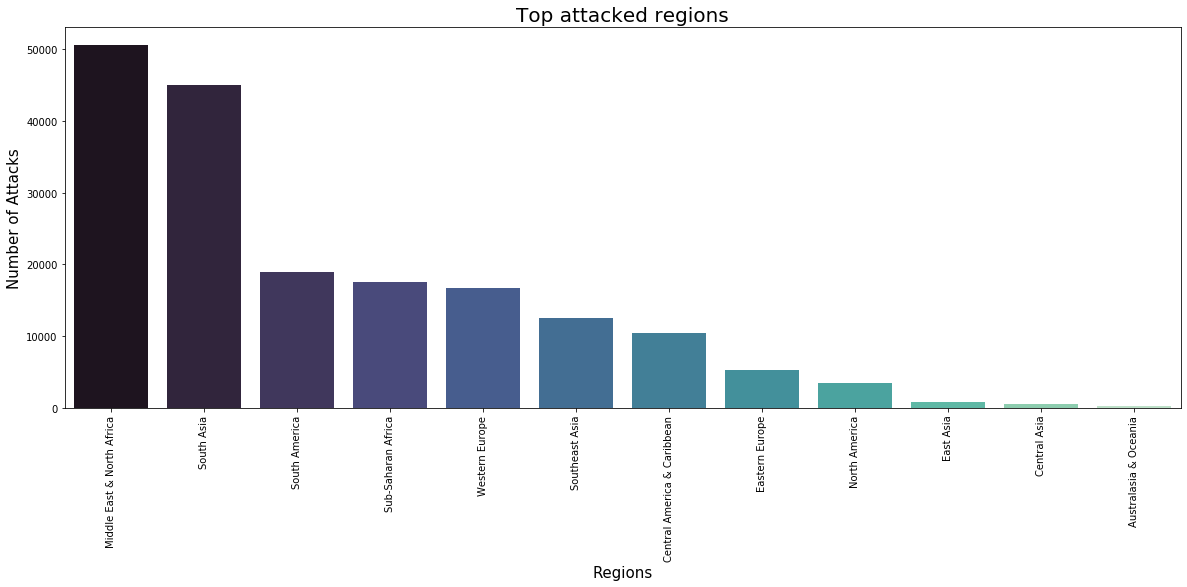

In [81]:
#Regions that were attacked the most:
plt.figure(figsize=(20,7))
sns.barplot(df1['Region'].value_counts().index, df1["Region"].value_counts().values,palette='mako')
plt.title('Top attacked regions',fontsize=20)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

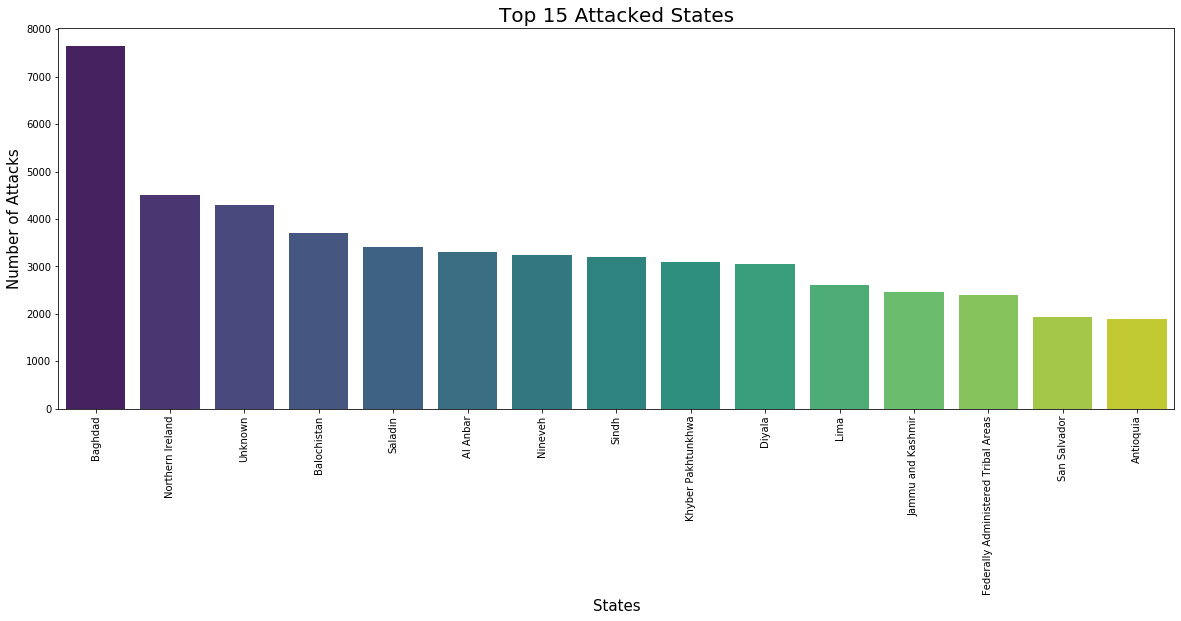

In [80]:
# States that were attacked the most
plt.figure(figsize=(20,7))
sns.barplot(df1['State'].value_counts().head(15).index,df1['State'].value_counts().head(15).values,palette="viridis")
plt.title('Top 15 Attacked States',fontsize=20)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

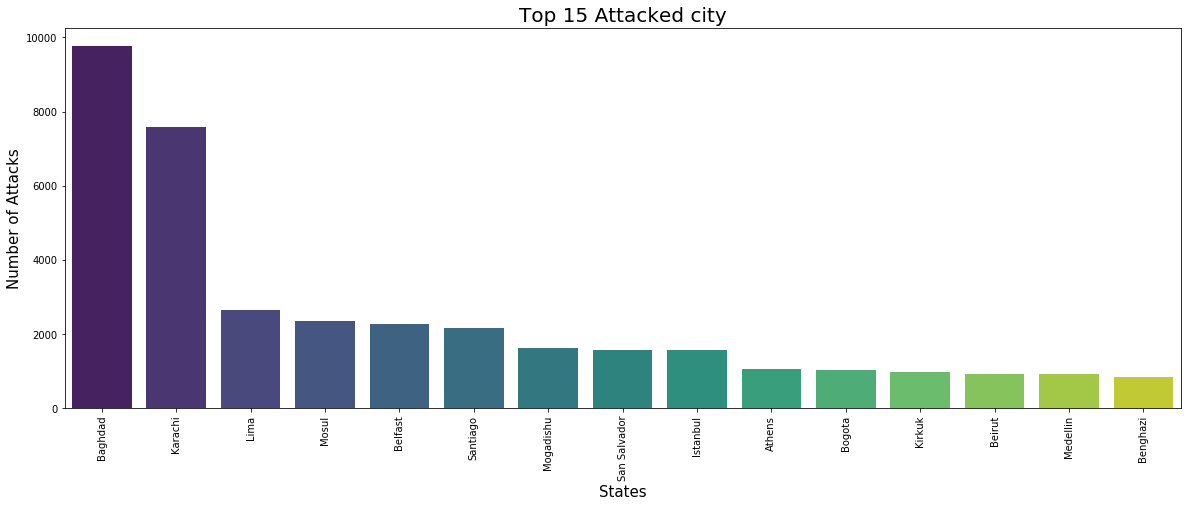

In [84]:
# city that were attacked the most
plt.figure(figsize=(20,7))
sns.barplot(df1['city'].value_counts().drop("Unknown").head(15).index,df1['city'].value_counts().head(15).values,palette="viridis")
plt.title('Top 15 Attacked city',fontsize=20)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

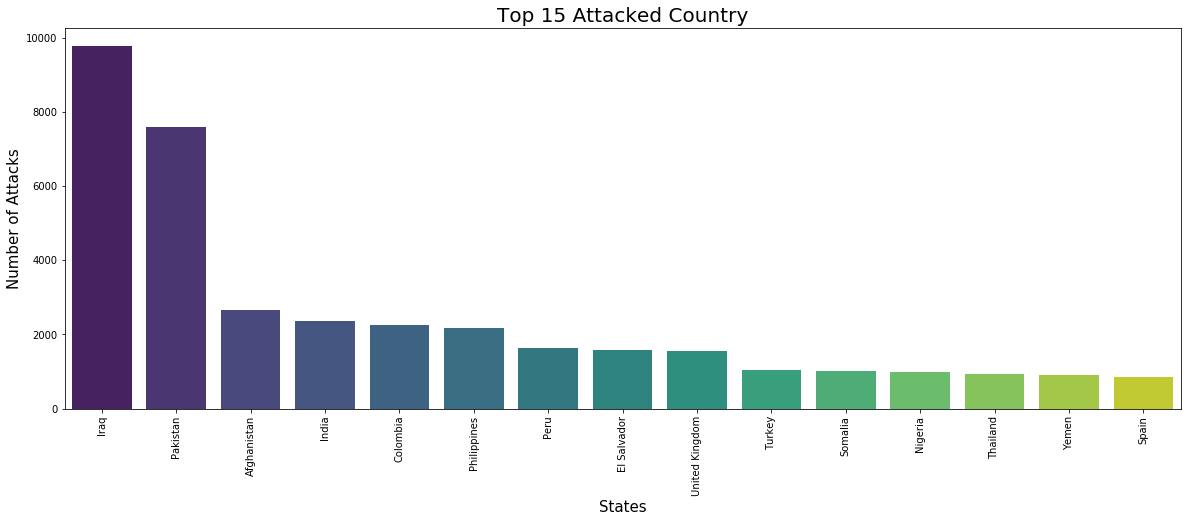

In [98]:
# city that were attacked the most
plt.figure(figsize=(20,7))
sns.barplot(df1['Country'].value_counts().head(15).index,df1['city'].value_counts().head(15).values,palette="viridis")
plt.title('Top 15 Attacked Country',fontsize=20)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Insights:
    1.Middle east and North African regions are most affted by terrorism
    2.Bagdad is most affected state
    3.Bagdad and Karachi are th most affected city

In [85]:
# Type of weapon used:

(df1["Weapon_type"].value_counts()/len(df1))*100

Explosives                                                                     50.820374
Firearms                                                                       32.237854
Unknown                                                                         8.354200
Incendiary                                                                      6.131941
Melee                                                                           2.018538
Chemical                                                                        0.176265
Sabotage Equipment                                                              0.077974
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.075228
Other                                                                           0.062599
Biological                                                                      0.019219
Fake Weapons                                                                    0.018121
Radiological         

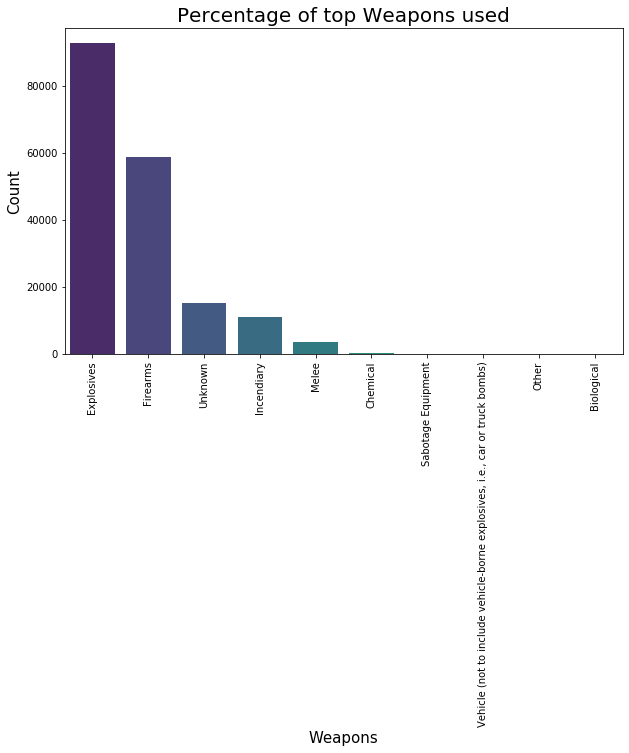

In [86]:
# Plotting the barplot of the top 10 weapons used by the terrorist:

plt.figure(figsize=(10,6))
sns.barplot(df1["Weapon_type"].value_counts()[:10].index,df1["Weapon_type"].value_counts()[:10].values,palette="viridis")
plt.title("Percentage of top Weapons used",fontsize=20)
plt.xlabel("Weapons",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Insights:
    Explosives and Firearms are used more wherein 51% is of explosives and around 32% firearms

**BIvariate Analysis**

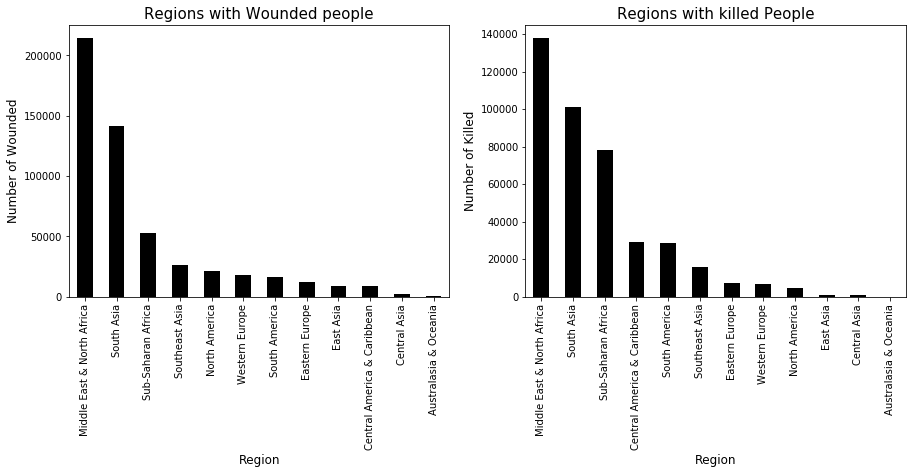

In [88]:
# Analysing the Number of people wounded by region:

plt.subplot(1,2,1)
df1.groupby(['Region'])['No_of_Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='cubehelix')
plt.title('Regions with Wounded people',fontsize=15)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Number of Wounded',fontsize=12)
plt.xticks(rotation=90)


# Analysing the Number of people killed by region:

plt.subplot(1,2,2)
df1.groupby(['Region'])['No_of_Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='cubehelix')
plt.title('Regions with killed People',fontsize=15)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Number of Killed',fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

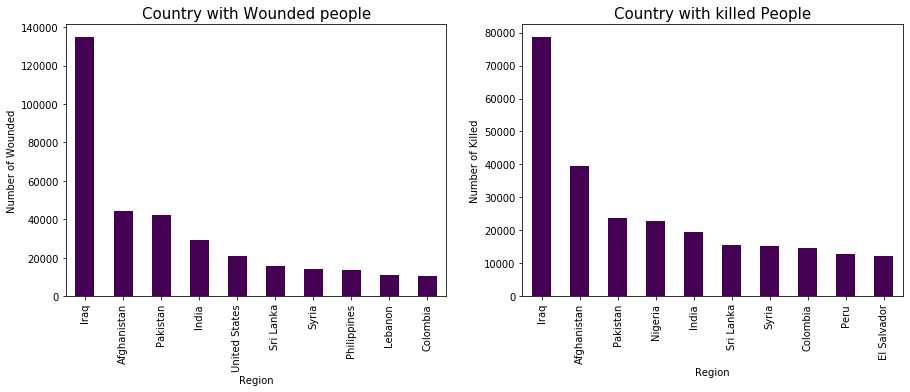

In [90]:
# Analysing the Number of people wounded by region:

plt.subplot(1,2,1)
df1.groupby(['Country'])['No_of_Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='viridis')
plt.title('Country with Wounded people',fontsize=15)
plt.xlabel('Region',fontsize=10)
plt.ylabel('Number of Wounded',fontsize=10)
plt.xticks(rotation=90)


# Analysing the Number of people killed by region:

plt.subplot(1,2,2)
df1.groupby(['Country'])['No_of_Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='viridis')
plt.title('Country with killed People',fontsize=15)
plt.xlabel('Region',fontsize=10)
plt.ylabel('Number of Killed',fontsize=10)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

In [ ]:
#top ten terrorist organisation 

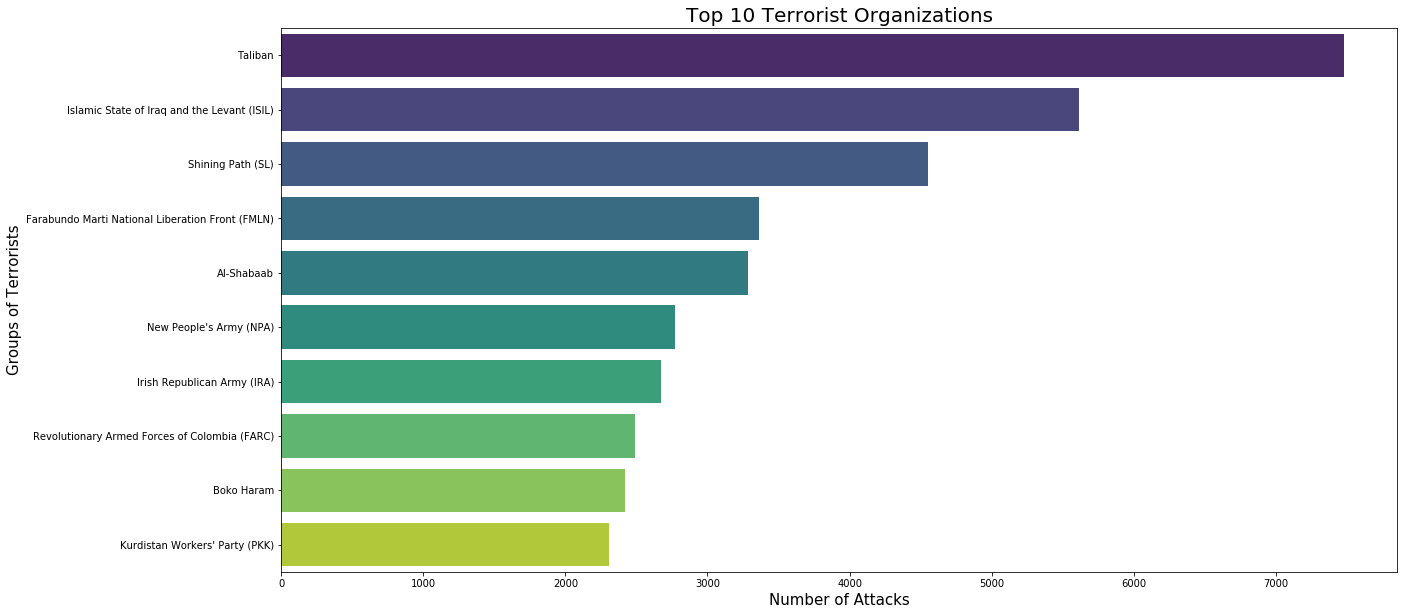

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(df1['Group'].value_counts()[1:11].values, df1['Group'].value_counts()[1:11].index,palette='viridis')
plt.title('Top 10 Terrorist Organizations',fontsize=20)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Groups of Terrorists',fontsize=15)
plt.show()

In [93]:
# Let us analyse how many attacks Taliban has made over the years:

df1_tal = df1[df1["Group"]=="Taliban"]

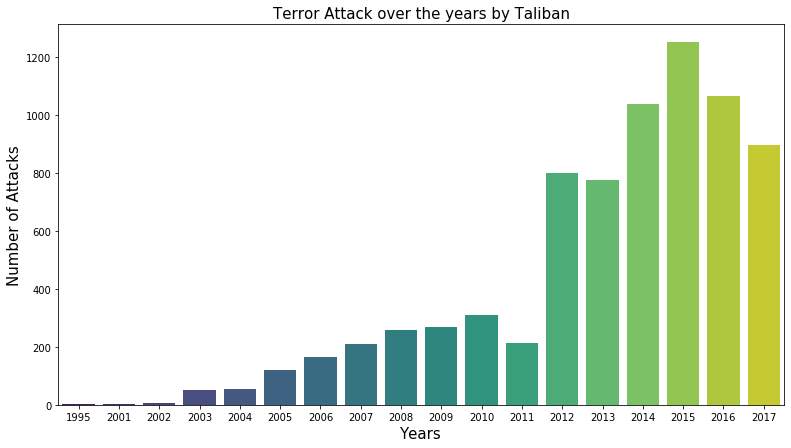

In [95]:
# Let us plot the attacks over the years made by Taliban:

plt.figure(figsize = (13,7))
sns.barplot(df1_tal['Year'].value_counts().index,df1_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.show()

# Conclusion

In [ ]:
1.We are Analysisng Data from 1970 till 2017
2.Iraq followed by pakistan is most affected country
3.There is a increase in  number of attack from 2012 which reached peak on 2014 with ,ore tham 16000 attack per year
4.After 2015 a downward trend is observed
5.Bombing/Explosion is most frequent attack type followed by Armed Assault
6.Number of people killed is maximum 0n 2014 which is 40000+
7.Number of people wounded is greater than 38000 from 2013 to 2016
8.Private Citizens and property is mostly affected by the attack followed by Military
9.Middle east and North African regions are most affted by terrorism
10.Bagdad is most affected state
11.Bagdad and Karachi are th most affected city
12.Explosives and Firearms are used more wherein 51% is of explosives and around 32% firearms
13.Taliban is th emost dangerous terrorist group followed by ISIL

So we can say hot zones are Middle East and North African Region,where Iraq is the most affected country.
Bagdad and Karachi are the hot zone cities